# Project Title: Stocked Market Prediction and Forecasting using LSTM

This project aims to create a robust machine learning model for predicting and forecasting stock market trends and prices using the LSTM (Long Short-Term Memory) neural network architecture. The model will be trained on historical stock market data, focusing on various factors such as stock prices, trading volumes, and relevant economic indicators. By utilizing LSTM, a type of recurrent neural network (RNN), this project aims to capture and analyze temporal dependencies in the data, allowing for more accurate and reliable stock market predictions. The performance of the model will be evaluated on unseen data, providing insights into its ability to assist investors, traders, and financial analysts in making informed decisions in the stock market.

### Import Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df1 = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [4]:
df1.shape

(2035, 8)

In [5]:
df1.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df1.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df1.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


### Preprocessing & Missing Values/Null Values Imputation

In [8]:
df1.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
df1[df1.duplicated()]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)


In [10]:
duplicate_value_count = len(df1[df1.duplicated()])

print('Number of duplicates value present is:',duplicate_value_count)

Number of duplicates value present is: 0


The dataset consists of 2,035 rows and 8 columns, providing a substantial volume of data for analysis. It's worth noting that there are no duplicate values within the dataset, underscoring the cleanliness and uniqueness of the data. This absence of duplicates ensures the integrity of the dataset, making it a reliable source for various data-driven tasks and analyses.



### Exploratory Data Analysis

<AxesSubplot:>

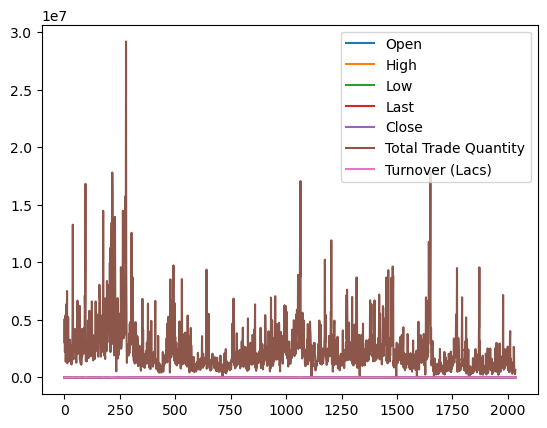

In [11]:
df1.plot()

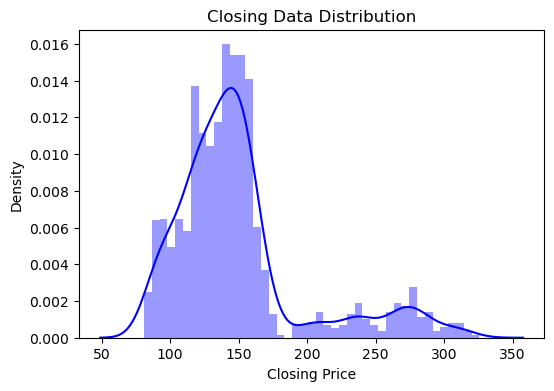

In [12]:
plt.figure(figsize=(6,4))
sns.distplot(df1['Close'],color="b")
plt.title('Closing Data Distribution')
plt.xlabel('Closing Price')
plt.show()

In [13]:
data_features = df1[['Open','High','Low','Last','Close','Total Trade Quantity','Turnover (Lacs)']]

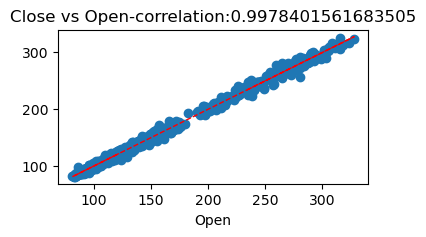

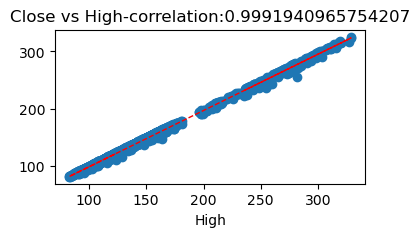

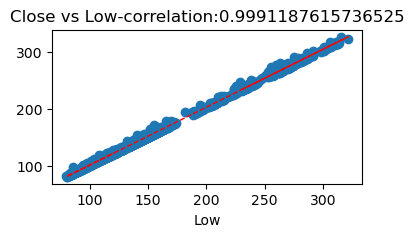

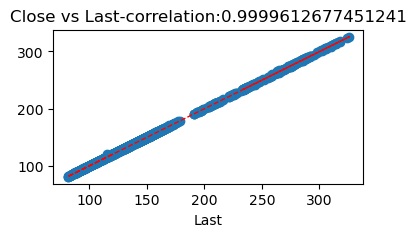

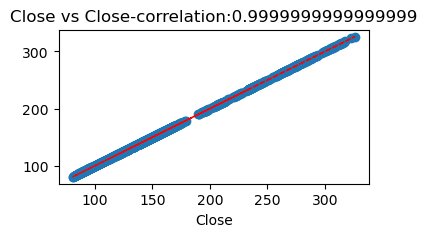

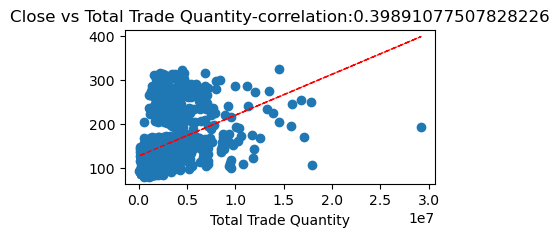

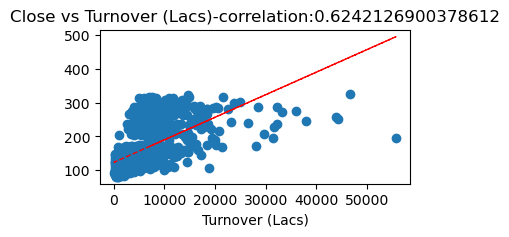

In [14]:
for cols in data_features:
  fig = plt.figure(figsize=(4, 2))
  ax = fig.gca()
  feature = df1[cols]
  label = df1['Close']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(cols)
  ax.set_title('Close vs' + ' ' + cols + '-correlation:' + str(correlation))
  z = np.polyfit(df1[cols], df1['Close'], 1)
  y_hat = np.poly1d(z)(df1[cols])
  plt.plot(df1[cols], y_hat, 'r--', lw=1)

plt.show()


<AxesSubplot:>

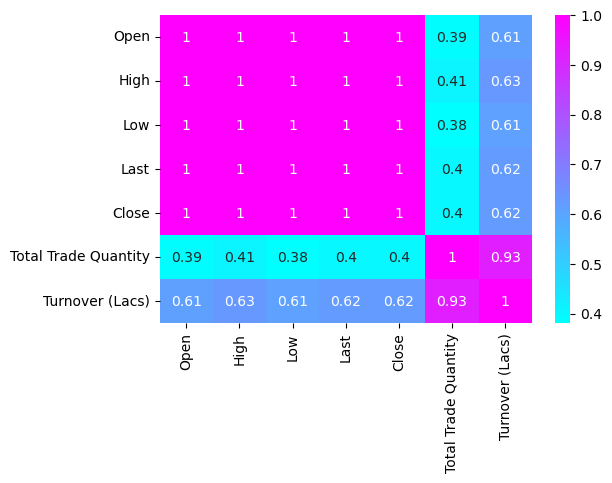

In [15]:
fig = plt.figure(figsize=(6,4))
correlation = df1.corr()
sns.heatmap(abs(correlation),annot=True,cmap='cool')

### Model Building

In [16]:
training_set = df1.iloc[:,1:2].values

In [17]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [18]:
len(training_set)

2035

#### Scaling the Datasets

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled =scaler.fit_transform(training_set)

In [20]:
x_train = []
y_train  = []
for i in range(60,2035):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [21]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 28s 179ms/step - loss: 0.0116
Epoch 2/100
62/62 [==============================] - 11s 173ms/step - loss: 0.0030
Epoch 3/100
62/62 [==============================] - 11s 173ms/step - loss: 0.0024
Epoch 4/100
62/62 [==============================] - 11s 177ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 11s 172ms/step - loss: 0.0027
Epoch 6/100
62/62 [==============================] - 11s 173ms/step - loss: 0.0021
Epoch 7/100
62/62 [==============================] - 11s 173ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 11s 176ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 11s 178ms/step - loss: 0.0019
Epoch 10/100
62/62 [==============================] - 11s 176ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 11s 173ms/step - loss: 0.0020
Epoch 12/100
62/62 [==============================] - 11s 175ms/step - loss: 0.0017
E

In [22]:
data_test = pd.read_csv('tatatest.csv')
real_stock_price = data_test.iloc[:, 1:2].values

In [23]:
data_total = pd.concat((df1['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

In [24]:
x_test = []
for i in range(60, 76):
    x_test.append(inputs[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


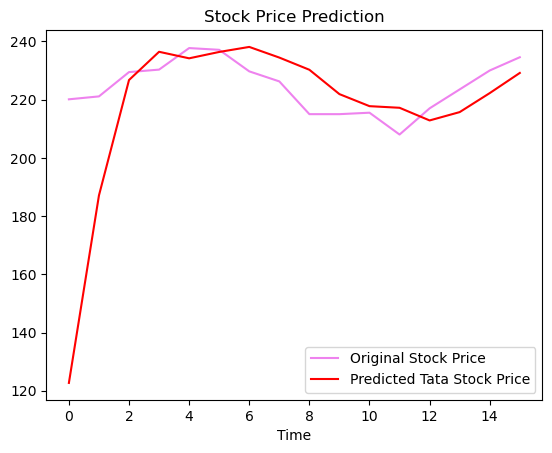

In [25]:
plt.plot(real_stock_price, color = 'violet', label = 'Original Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Tata Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel = ('Tata Stock Price')
plt.legend()
plt.show()

While this model didn't consistently align with the precise price points of the actual data, it demonstrated its proficiency in capturing the overarching trends and broader market movements. It effectively discerned between periods of upward and downward price trends, illustrating the model's competence in time series forecasting. This project serves as a compelling testament to the model's potential in providing valuable insights for investors and analysts seeking to understand and anticipate market dynamics. It also underscores the importance of considering trend analysis and pattern recognition, which can be crucial in financial decision-making and market strategy development.